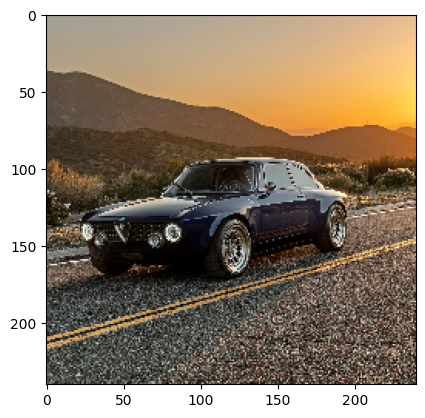

In [2]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input

img_path='img.jpg'
my_img=imread(img_path)
#imshow(my_img)

SIZE = 240

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h = SIZE # img.shape[0] - h - fixed
w = round(img.shape[1]*(h/img.shape[0])) # keeps the ratio
new_img = cv2.resize(img, (w,h))
w_start=round((w-h)/2)
w_end=w_start+SIZE
crop_img = new_img[0:SIZE, w_start:w_end]
imshow(crop_img)

In [4]:
!pip install efficientnet_pytorch

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=7ea480ed2916693e2850e2268eb25703bb08dad91c18cd545676b186816415c5
  Stored in directory: c:\users\miki\appdata\local\pip\cache\wheels\03\3f\e9\911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [5]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained('efficientnet-b0')

# ... image preprocessing as in the classification example ...
print(crop_img.shape) # torch.Size([1, 3, 224, 224])

features = model.extract_features(crop_img)
print(features.shape) # torch.Size([1, 1280, 7, 7])

C:\Users\Miki\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to C:\Users\Miki/.cache\torch\hub\checkpoints\efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 22.1MB/s]


Loaded pretrained weights for efficientnet-b0
(240, 240, 3)


TypeError: pad(): argument 'input' (position 1) must be Tensor, not numpy.ndarray